# DATA 201: Week 4/5 Weather Data Cleaning <a class="anchor" id="0"></a>

1. [Data Cleaning](#1)
   - 1.1 [Read Data & Headers, Drop Nan Columns and without headers](#2)
   - 1.2 [Change Column Headers](#3)
   - 1.3 [Set Index to Data Time Object](#4)
   - 1.4 [Reduce Data Frame to just one week](#5)
   - 1.5 [Output to CSV](#6)

2. [Descriptive Analysis](#7)
    - 2.1 [Temperature Data vs. Date Time for the week of Sept. 6th](#8)
    - 2.2 [Temperature Data vs. Date Time from month 2017-07 to 2018-01](#9)
    - 2.3 [Indoor/Outdoor Temperature Histogram from month 2017-07 to 2018-01](#10)
    - 2.4 [Wind Speed and Direction over the Sept 6th Week](#11)
    - 2.5 [The Relationship between Barometric Pressure and Rain Fall over the Sept 6th Week](#12)

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## Data Cleaning <a class="anchor" id="1"></a>
### Read Data & Headers, Drop Nan Columns and without headers <a class="anchor" id="2"></a>
[TOP](#0)

In [34]:
# Read in Unclean Data
headers = pd.read_csv("../unclean/csv column headers.csv", header=None).iloc[1].to_list()
df = pd.read_csv("../unclean/2017dbase.csv", header=None)

# Drop Columns without headers (Columns after index 66)
df = df.drop(range(len(headers), len(df.columns)), axis=1)

# Convert date time information to datetime64 object
df[0] = pd.to_datetime(df[0], format="%Y%m%d%H%M")

# Assign Column Headers
df.columns = headers

# Drop NaNs
df = df[df.columns.dropna()]


### Change Column Headers <a class="anchor" id="3"></a>
[TOP](#0)

In [35]:
# Change column headers

print("Old Index:")
print(df.columns)

df = df.rename(columns={'DATE (YYYYMonthDayHourMinute)': 'date_time',
                        'WIND DIR': 'wind_direction',
                        'WIND SPD': 'wind_speed',
                        'GUST': 'wind_gust',
                        'IN HUM': 'humidity_indoor',
                        'OUT HUM': 'humidity_outdoor',
                        'IN TEMP': 'temperature_indoor',
                        'OUT TEMP': 'temperature_outdoor',
                        'BARO': 'barometric_pressure',
                        'EVAPOTRANSPIRATION': 'evaporation_transpiration',
                        'WIND CHILL': 'wind_chill',
                        'IN HEAT INDEX': 'heat_index_indoor',
                        'OUT HEAT INDEX': 'heat_index_outdoor',
                        'DEW PT': 'dew_point',
                        'IN HUM RATE': 'humidity_rate_indoor',
                        'OUT HUM RATE': 'humidity_rate_outdoor',
                        'IN TEMP RATE': 'temperature_rate_indoor',
                        'OUT TEMP RATE': 'temperature_rate_outdoor',
                        'BARO RATE': 'barometric_pressure_rate',
                        'WIND CHILL RATE': 'wind_chill_rate',
                        'IN HEAT INDEX RATE': 'heat_index_indoor_rate',
                        'OUT HAET RATE': 'heat_index_outdoor_rate',
                        'DEW PT RATE': 'dew_point_rate',
                        'RAIN DAILY': 'rain_daily',
                        'RAIN HOURLY': 'rain_hourly',
                        'LAST 24 HOUR RAIN': 'rain_last_24_hours',
                        'TOT RAIN': 'rain_total',
                        'DEGREE DAYS HEATING DAILY':'ac_degree_heating_daily',
                        'DEGREE DAYS COOLING DAILY':'ac_degree_cooling_daily',
                        'DEGREE DAYS HEATING MONTHLY':'ac_degree_heating_monthly',
                        'DEGREE DAYS COOLING MONTHLY':'ac_degree_cooling_monthly' ,
                        'DEGREE DAYS HEATING YEARLY':'ac_degree_heating_yearly',
                        'DEGREE DAYS COOLING YEARLY':'ac_degree_cooling_monthly',
                        'MOON PHASE':'moon_phase',
                        'MONTHLY RAIN':'rain_monthly'
                        })

print("\nNew Index:")
print(df.columns)


Old Index:
Index(['DATE (YYYYMonthDayHourMinute)', 'WIND DIR', 'WIND SPD', 'GUST',
       'IN HUM', 'OUT HUM', 'IN TEMP', 'OUT TEMP', 'BARO', 'TOT RAIN',
       'TOT RAIN', 'EVAPOTRANSPIRATION', 'WIND CHILL', 'IN HEAT INDEX',
       'OUT HEAT INDEX', 'DEW PT', 'IN HUM RATE', 'OUT HUM RATE',
       'IN TEMP RATE', 'OUT TEMP RATE', 'BARO RATE', 'TOT RAIN', 'TOT RAIN',
       'WIND CHILL RATE', 'IN HEAT INDEX RATE', 'OUT HAET RATE', 'DEW PT RATE',
       'RAIN DAILY', 'RAIN HOURLY', 'LAST 24 HOUR RAIN',
       'DEGREE DAYS HEATING DAILY', 'DEGREE DAYS COOLING DAILY', 'MOON PHASE',
       'MONTHLY RAIN', 'DEGREE DAYS HEATING MONTHLY',
       'DEGREE DAYS COOLING MONTHLY', 'DEGREE DAYS HEATING YEARLY',
       'DEGREE DAYS COOLING YEARLY'],
      dtype='object')

New Index:
Index(['date_time', 'wind_direction', 'wind_speed', 'wind_gust',
       'humidity_indoor', 'humidity_outdoor', 'temperature_indoor',
       'temperature_outdoor', 'barometric_pressure', 'rain_total',
       'rain_total', 

### Set Index to Data Time Object: <a class="anchor" id="4"></a>
[TOP](#0)

In [36]:
df = df.set_index('date_time')

### Reduce Data Frame to just one week (2017-09-01 to 2017-09-08) <a class="anchor" id="5"></a>
[TOP](#0)

In [37]:
finaldf = df["2017-09-01":"2017-09-08"]
finaldf

,wind_direction,wind_speed,wind_gust,humidity_indoor,humidity_outdoor,temperature_indoor,temperature_outdoor,barometric_pressure,rain_total,rain_total,...,rain_hourly,rain_last_24_hours,ac_degree_heating_daily,ac_degree_cooling_daily,moon_phase,rain_monthly,ac_degree_heating_monthly,ac_degree_cooling_monthly,ac_degree_heating_yearly,ac_degree_cooling_monthly
date_time,,,,,,,,,,,,,,,,,,,,,
2017-09-01 00:00:00,234.0,0,0,47,76.7,80.1,75.9,29.978,31.76,0.0,...,0.0,0.0,0.000,13.318,9.913,0.00,0.023,420.521,1709.498,1657.330
2017-09-01 00:10:00,235.0,0,3,46,76.7,80.1,75.8,29.978,31.76,0.0,...,0.0,0.0,0.000,0.081,9.919,0.00,0.000,0.081,1709.498,1657.411
2017-09-01 00:20:00,234.0,0,3,47,76.7,80.1,75.7,29.972,31.76,0.0,...,0.0,0.0,0.000,0.160,9.926,0.00,0.000,0.160,1709.498,1657.491
2017-09-01 00:30:00,225.0,0,0,48,77.7,80.1,75.5,29.972,31.76,0.0,...,0.0,0.0,0.000,0.240,9.932,0.00,0.000,0.240,1709.498,1657.570
2017-09-01 00:40:00,225.0,0,0,47,76.7,80.1,75.4,29.972,31.76,0.0,...,0.0,0.0,0.000,0.317,9.938,0.00,0.000,0.317,1709.498,1657.648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-08 23:10:00,85.0,0,0,33,70.7,77.9,62.1,30.205,33.94,0.0,...,0.0,0.0,1.701,5.673,17.715,2.18,4.282,62.518,1713.781,1719.848
2017-09-08 23:20:00,85.0,0,0,33,71.7,77.9,62.0,30.207,33.94,0.0,...,0.0,0.0,1.716,5.673,17.723,2.18,4.297,62.518,1713.797,1719.848
2017-09-08 23:30:00,85.0,0,0,33,72.7,77.9,61.8,30.209,33.94,0.0,...,0.0,0.0,1.732,5.673,17.730,2.18,4.313,62.518,1713.813,1719.848


### Output to CSV <a class="anchor" id="6"></a>
[TOP](#0)

In [38]:
finaldf.to_csv("2017_weather_09_01-08.csv")


---
## Descriptive Analysis <a class="anchor" id="7"></a>
[TOP](#0)

In [39]:
def histogram(var, unit="", bin='auto', fig_x=12, fig_y=5):
    fig = plt.figure(figsize=(fig_x, fig_y))
    plt.title(var.name.replace('_',' ').title())
    plt.xlabel(f"{var.name.replace('_',' ').title()} [{unit}]")
    plt.ylabel(f"Count")
    plt.hist(var, bins=bin)
    plt.show()

In [40]:
def plot(x_var, y_vars, x_unit="", y_unit="",fig_x=12, fig_y=5):
    plt.figure(figsize=(fig_x, fig_y))
    plt.title(f"{', '.join(str(y.name).replace('_',' ').title() for y in y_vars)} vs {x_var.name.replace('_','').title()}")
    for y_var in y_vars:
        plt.plot(x_var, y_var, label=str(y_var.name).replace('_',' ').title())
    plt.xlabel(f"{x_var.name.replace('_',' ').title()} [{x_unit}]")
    plt.ylabel(f"[{y_unit}]")
    plt.legend(shadow=True, loc='upper left')
    plt.show()


### Temperature Data vs. Date Time for the week of Sept. 6th <a class="anchor" id="8"></a>
[TOP](#0)

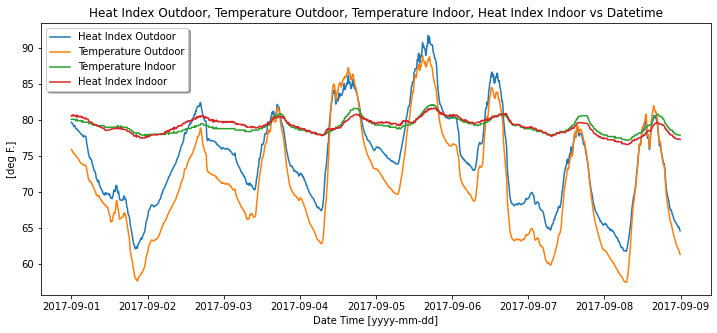

In [41]:
plot(finaldf.index, [finaldf.heat_index_outdoor, finaldf.temperature_outdoor, finaldf.temperature_indoor, finaldf.heat_index_indoor], x_unit="yyyy-mm-dd", y_unit="deg F.")


### Temperature Data vs. Date Time from month 2017-07 to 2018-01 <a class="anchor" id="9"></a>
[TOP](#0)

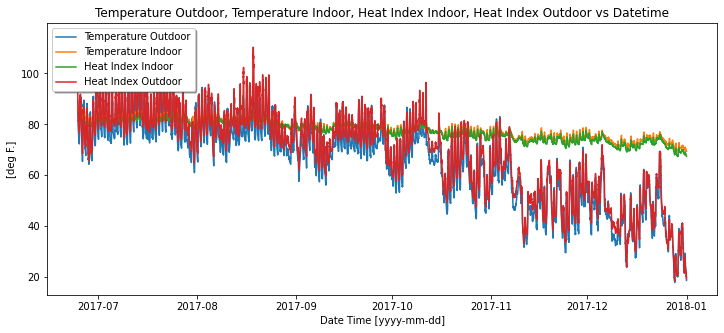

In [42]:
plot(df.index, [df.temperature_outdoor, df.temperature_indoor, df.heat_index_indoor, df.heat_index_outdoor], x_unit="yyyy-mm-dd", y_unit="deg F.")

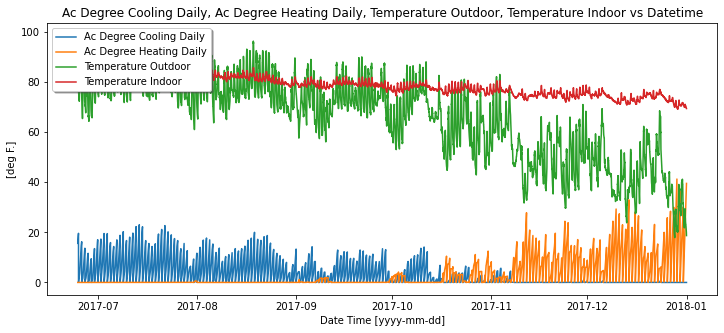

In [43]:
plot(df.index, [df.ac_degree_cooling_daily, df.ac_degree_heating_daily, df.temperature_outdoor, df.temperature_indoor], x_unit="yyyy-mm-dd", y_unit="deg F.")


### Indoor/Outdoor Temperature Histogram from month 2017-07 to 2018-01 <a class="anchor" id="10"></a>
[TOP](#0)

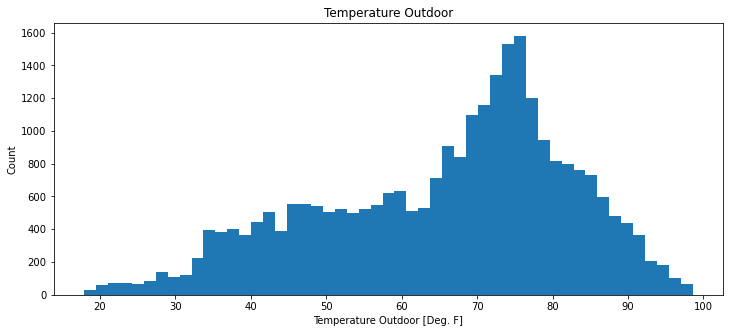

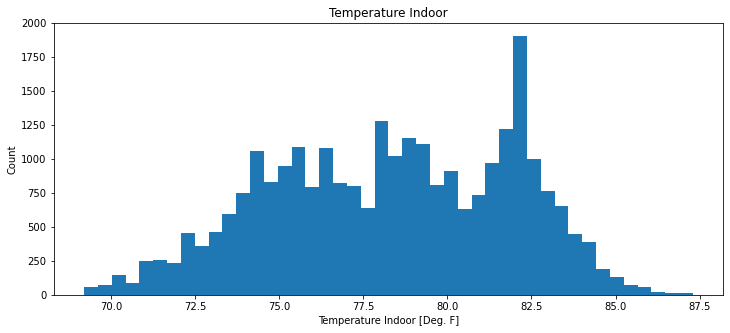

In [44]:
histogram(df.temperature_outdoor, unit='Deg. F')
histogram(df.temperature_indoor, unit='Deg. F')


### Wind Speed and Direction over the Sept 6th Week <a class="anchor" id="11"></a>
[TOP](#0)

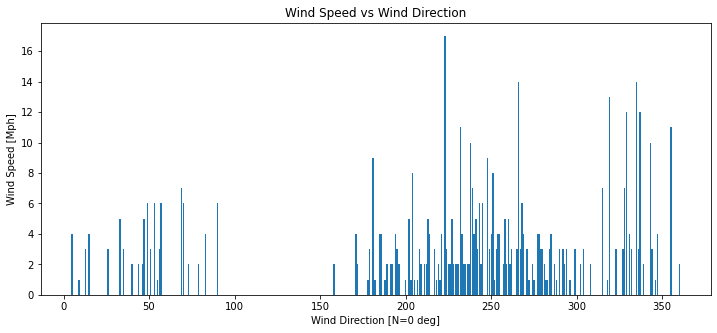

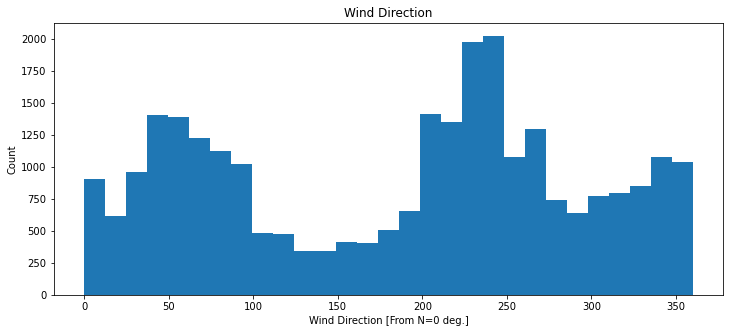

In [45]:

plt.figure(figsize=(12, 5))
plt.title("Wind Speed vs Wind Direction")
plt.bar(finaldf.wind_direction, finaldf.wind_speed)
plt.ylabel("Wind Speed [Mph]")
plt.xlabel("Wind Direction [N=0 deg]")
plt.show()

histogram(df.wind_direction, unit='From N=0 deg.')

### The Relationship between Barometric Pressure and Rain Fall over the Sept 6th Week <a class="anchor" id="12"></a>
[TOP](#0)

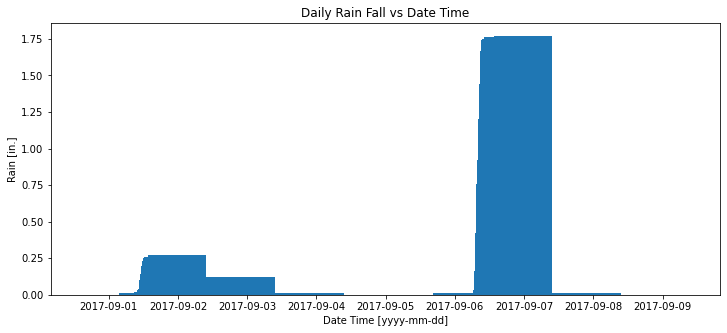

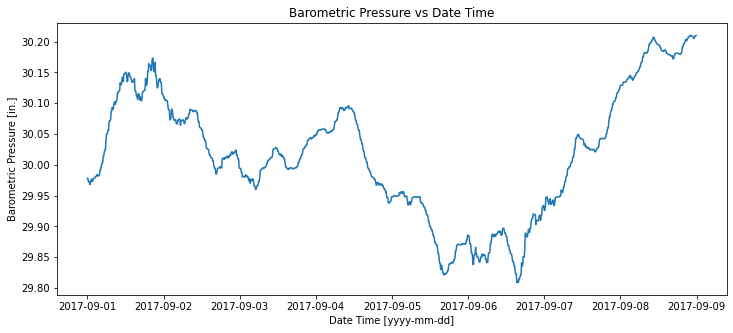

In [46]:

plt.figure(figsize=(12, 5))
plt.title("Daily Rain Fall vs Date Time")
plt.bar(finaldf.index, finaldf.rain_daily)
plt.ylabel("Rain [in.]")
plt.xlabel("Date Time [yyyy-mm-dd]")
plt.show()

plt.figure(figsize=(12, 5))
plt.title("Barometric Pressure vs Date Time")
plt.plot(finaldf.index, finaldf.barometric_pressure)
plt.ylabel("Barometric Pressure [in.]")
plt.xlabel("Date Time [yyyy-mm-dd]")
plt.show()